In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('sbi_train.csv')
data

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,SBIN,2275.00,2300.00,2275.00,2291.20,1103147
1,2010-01-05,SBIN,2308.00,2310.00,2280.10,2292.05,1161374
2,2010-01-06,SBIN,2297.00,2315.00,2285.00,2305.80,1452793
3,2010-01-07,SBIN,2306.00,2310.00,2281.10,2292.90,857651
4,2010-01-08,SBIN,2294.00,2303.90,2280.10,2286.05,1045382
...,...,...,...,...,...,...,...
1490,2015-12-24,SBIN,230.85,231.00,227.60,228.30,7257958
1491,2015-12-28,SBIN,229.05,229.95,228.00,228.90,8756879
1492,2015-12-29,SBIN,228.85,229.95,227.50,228.20,7263286
1493,2015-12-30,SBIN,229.00,229.70,224.85,225.80,11702877


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1495 non-null   object 
 1   Symbol  1495 non-null   object 
 2   Open    1495 non-null   float64
 3   High    1495 non-null   float64
 4   Low     1495 non-null   float64
 5   Close   1495 non-null   float64
 6   Volume  1495 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 81.9+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1495, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 19s - loss: 0.0298 - 19s/epoch - 553ms/step
Epoch 2/20
35/35 - 8s - loss: 0.0090 - 8s/epoch - 219ms/step
Epoch 3/20
35/35 - 8s - loss: 0.0050 - 8s/epoch - 226ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0041 - 7s/epoch - 213ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0046 - 7s/epoch - 210ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 204ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0038 - 7s/epoch - 206ms/step
Epoch 8/20
35/35 - 8s - loss: 0.0037 - 8s/epoch - 216ms/step
Epoch 9/20
35/35 - 8s - loss: 0.0035 - 8s/epoch - 222ms/step
Epoch 10/20
35/35 - 8s - loss: 0.0035 - 8s/epoch - 228ms/step
Epoch 11/20
35/35 - 8s - loss: 0.0035 - 8s/epoch - 217ms/step
Epoch 12/20
35/35 - 6s - loss: 0.0031 - 6s/epoch - 184ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0045 - 7s/epoch - 198ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0046 - 6s/epoch - 185ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0031 - 7s/epoch - 194ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0043 - 7s/epoch - 193ms/step
Epoch 17/20
35/

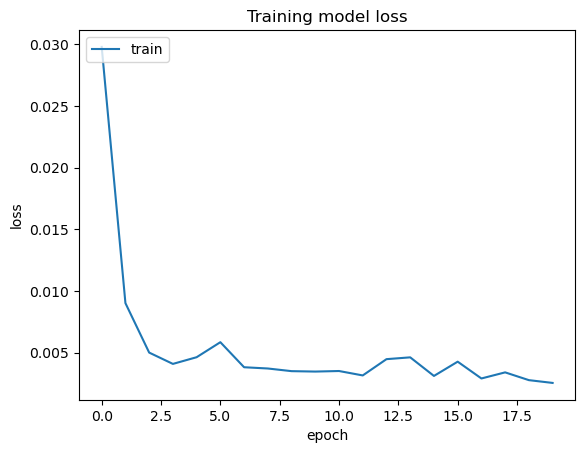

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('sbi_test.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(926, 60, 1)

In [13]:
y_pred=model.predict(X_test)
y_pred

29/29 [==============================] - 4s 70ms/step


array([[-4.79917228e-03],
       [-4.43844497e-03],
       [-4.14071232e-03],
       [-3.89848650e-03],
       [-3.72730941e-03],
       [-3.64740193e-03],
       [-3.67306918e-03],
       [-3.80787626e-03],
       [-4.03827429e-03],
       [-4.32937592e-03],
       [-4.63026017e-03],
       [-4.90832329e-03],
       [-5.14980033e-03],
       [-5.33680990e-03],
       [-5.45206666e-03],
       [-5.47600538e-03],
       [-5.40198013e-03],
       [-5.23421913e-03],
       [-4.99791652e-03],
       [-4.73750010e-03],
       [-4.49851900e-03],
       [-4.31973487e-03],
       [-4.23619151e-03],
       [-4.26880270e-03],
       [-4.41604480e-03],
       [-4.64768708e-03],
       [-4.91978973e-03],
       [-5.19740954e-03],
       [-5.45264035e-03],
       [-5.66966087e-03],
       [-5.86521626e-03],
       [-6.06328249e-03],
       [-6.28601760e-03],
       [-6.54980540e-03],
       [-6.86328113e-03],
       [-7.23024830e-03],
       [-7.65019655e-03],
       [-8.10153410e-03],
       [-8.5

In [14]:
predicted_price=sc.inverse_transform(y_pred)

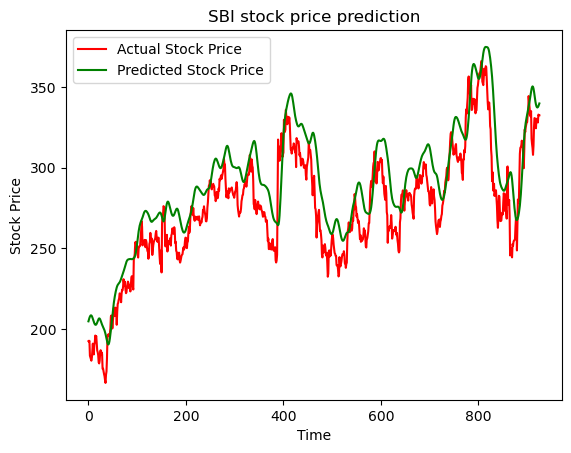

In [15]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('SBI stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [16]:
sum(y_pred)/len(y_pred)

array([0.02143914], dtype=float32)

In [17]:
sum(y_test)/len(y_test)

array([274.59703024])

In [18]:
cutoff=0.04
y_pred_classes = np.zeros_like(y_pred)
y_pred_classes[y_pred>cutoff]=1

In [19]:
cutoff=275
y_test_classes = np.zeros_like(y_test)
y_test_classes[y_test > cutoff] = 1

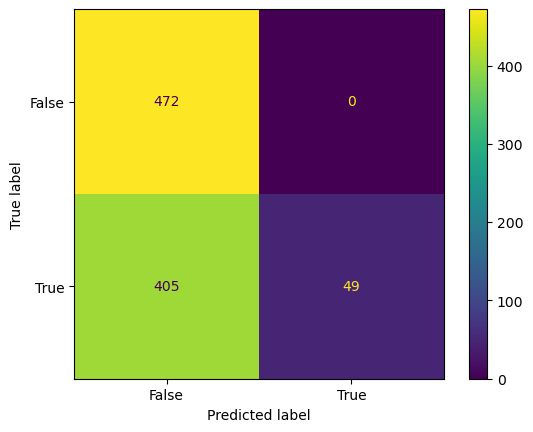

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test_classes,y_pred_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [21]:
len(y_pred)

926